In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate
import cv2 as cv2
from os import listdir

fnamesAcapella = 'images/acapella'
fnamesAerobika = 'images/aerobika'


In [62]:
def indexes(y, thres=0.10, min_dist=1, thres_abs=False):
    """Peak detection routine.

    Finds the numeric index of the peaks in *y* by taking its first order difference. By using
    *thres* and *min_dist* parameters, it is possible to reduce the number of
    detected peaks. *y* must be signed.

    Parameters
    ----------
    y : ndarray (signed)
        1D amplitude data to search for peaks.
    thres : float between [0., 1.]
        Normalized threshold. Only the peaks with amplitude higher than the
        threshold will be detected.
    min_dist : int
        Minimum distance between each detected peak. The peak with the highest
        amplitude is preferred to satisfy this constraint.
    thres_abs: boolean
        If True, the thres value will be interpreted as an absolute value, instead of
        a normalized threshold.

    Returns
    -------
    ndarray
        Array containing the numeric indexes of the peaks that were detected
    """
    if isinstance(y, np.ndarray) and np.issubdtype(y.dtype, np.unsignedinteger): # data must be one dimension and be signed
        raise ValueError("y must be signed")

    if not thres_abs: # if thresh not absolute
        thres = thres * (np.max(y) - np.min(y)) + np.min(y)
        
    min_dist = int(min_dist) # min_dist parameter

    # compute first order difference
    dy = np.diff(y) 

    # propagate left and right values successively to fill all plateau pixels (0-value)
    zeros,=np.where(dy == 0) # indexes in dy where values is 0
    
    # check if the singal is totally flat
    if len(zeros) == len(y) - 1: # if len of zeroe indexes same as length of data then data is totally flat so return 0 breaths
        return np.array([])
    
    while len(zeros):
        # add pixels 2 by 2 to propagate left and right value onto the zero-value pixel
        zerosr = np.hstack([dy[1:], 0.])
        zerosl = np.hstack([0., dy[:-1]])

        # replace 0 with right value if non zero
        dy[zeros]=zerosr[zeros]
        zeros,=np.where(dy == 0)

        # replace 0 with left value if non zero
        dy[zeros]=zerosl[zeros]
        zeros,=np.where(dy == 0)

    # find the peaks by using the first order difference
    peaks = np.where((np.hstack([dy, 0.]) < 0.)
                     & (np.hstack([0., dy]) > 0.)
                     & (np.greater(y, thres)))[0]

    # handle multiple peaks, respecting the minimum distance
    if peaks.size > 1 and min_dist > 1:
        highest = peaks[np.argsort(y[peaks])][::-1]
        rem = np.ones(y.size, dtype=bool)
        rem[peaks] = False

        for peak in highest:
            if not rem[peak]:
                sl = slice(max(0, peak - min_dist), peak + min_dist + 1)
                rem[sl] = True
                rem[peak] = False

        peaks = np.arange(y.size)[~rem]

    return peaks

def breadthLen(peak,listd):
    start = peak
    end = peak
    sB = False
    eB = False
    #print(peak)
    while(sB == False or eB == False):
        if(sB == False):
            start = start - 1
            if (listd[start] <= 2):
                sB = True
        
        if(eB == False and (end <= len(listd) - 2)):
            end = end + 1
            
            if (listd[end] <= 2 or (end == len(listd) - 1)):
                eB = True
            
    x = []
    x.extend([start,peak,end])
    return x

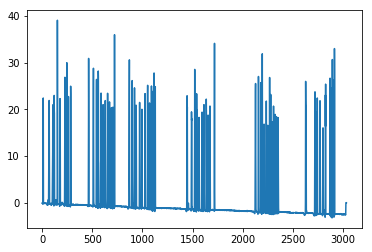

In [64]:
data1 = pd.read_csv('ACT/aer/fizzyo_Pressure_Vals_da2ffea5-3f03-46d2-a7f4-ddcf40c4ad1a.csv')
d1 = data1['Pressure Values(mbar)'].tolist()
d1 = d1[1:]
plt.plot(d1[0:])

In [65]:
cb = np.array(d1)
indexesA = indexes(cb, thres= 5, min_dist= 10, thres_abs = True)
#indexesG = indexes(cb, thres= 7, min_dist= 10, thres_abs = True)
# [ 333  693 1234 1600]
#print(len(indexesF))
#interpolatedIndexes = peakutils.interpolate(range(0, cb , ind=indexes))

start = []
peaks1 = []
end = []
breadths = []

breadths = []
for i in indexesA:
    breadths.append(breadthLen(i,cb))
    peaks1.append(breadthLen(i,cb)[1])
    

    
#plt.plot(vals2)
#len(indexesA)



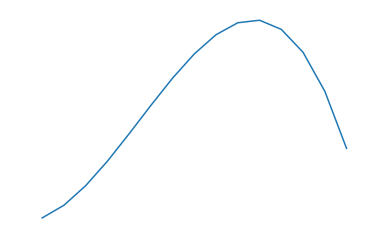

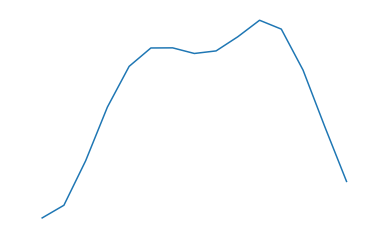

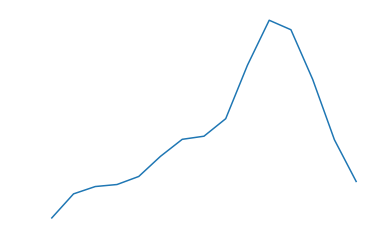

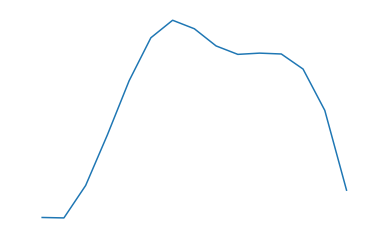

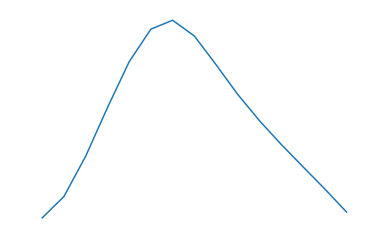

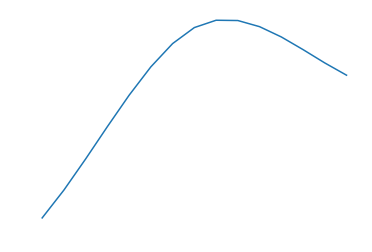

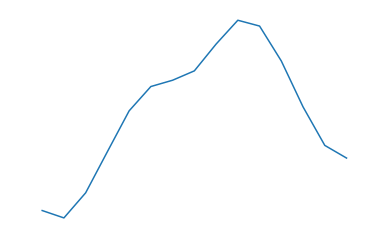

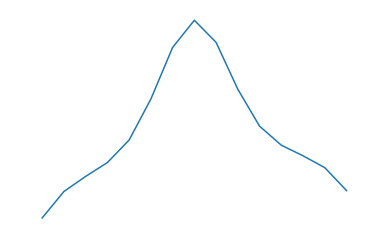

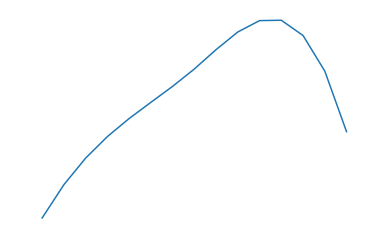

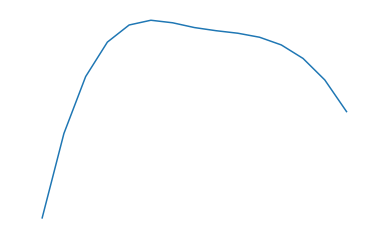

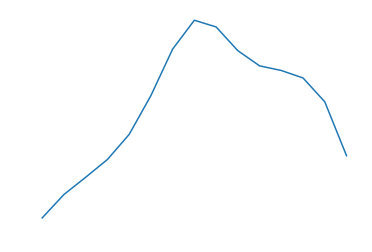

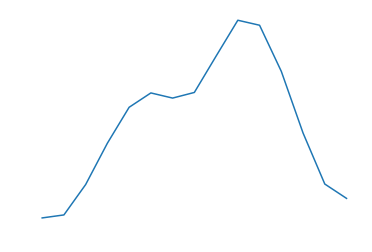

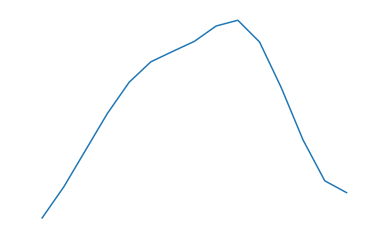

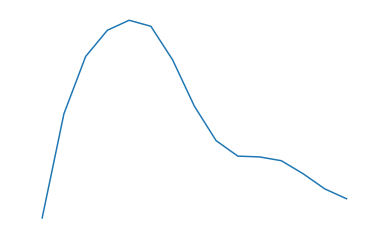

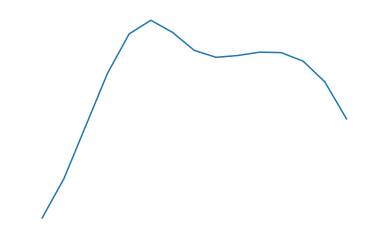

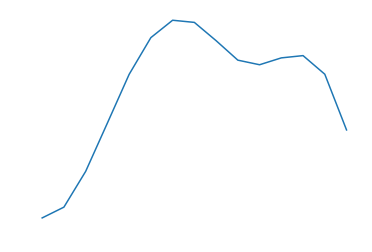

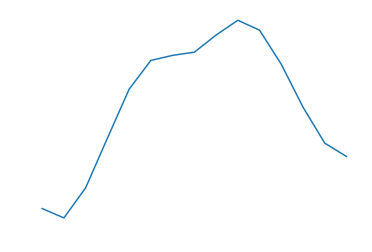

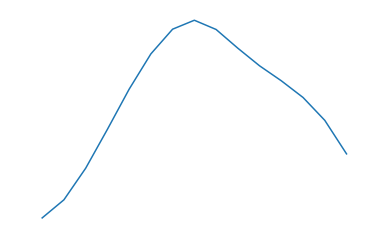

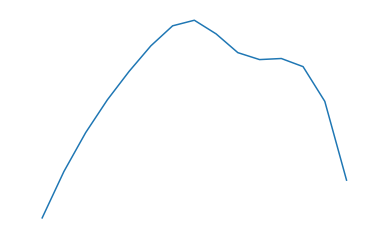

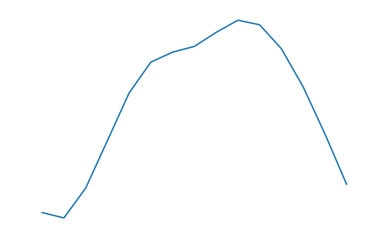

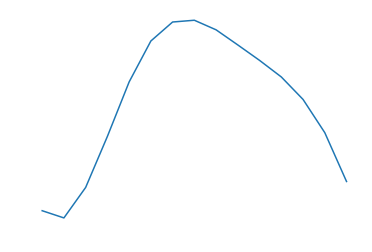

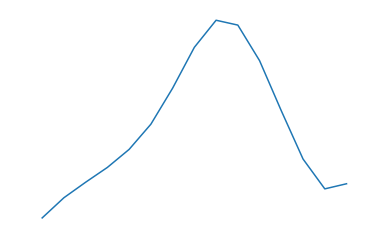

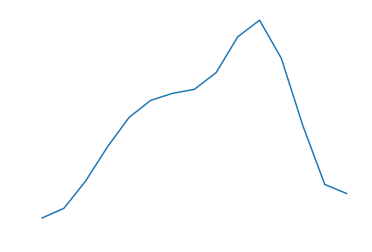

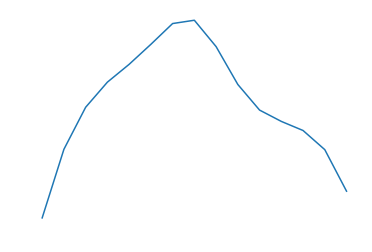

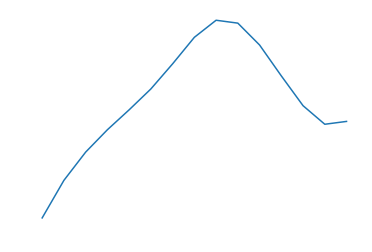

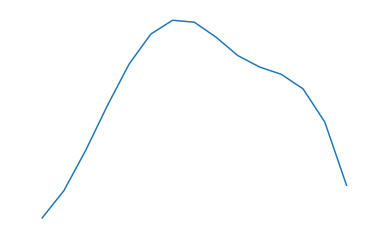

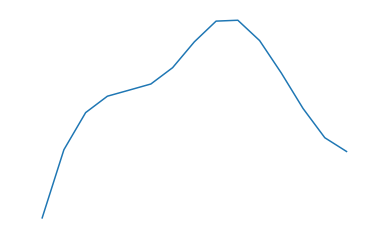

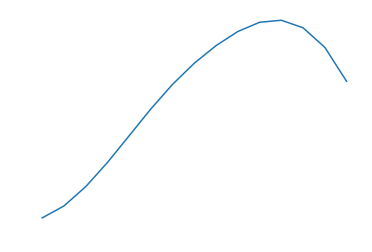

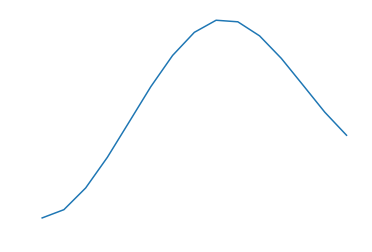

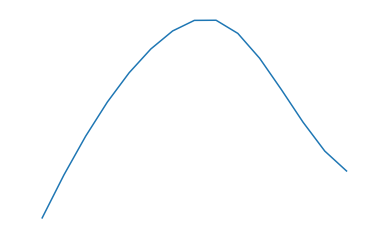

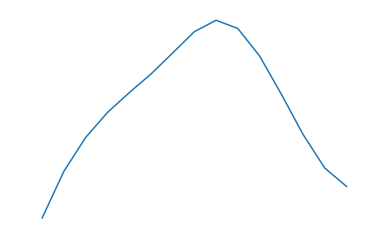

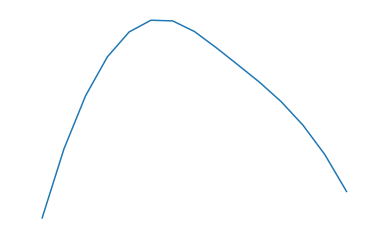

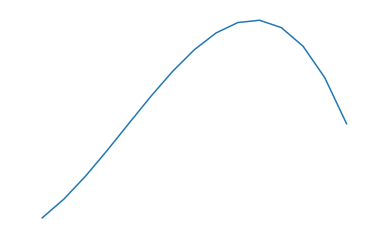

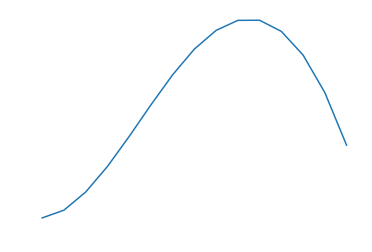

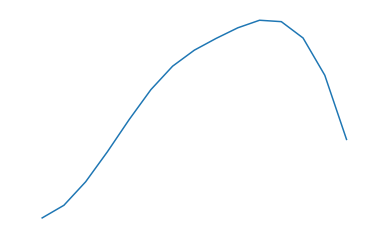

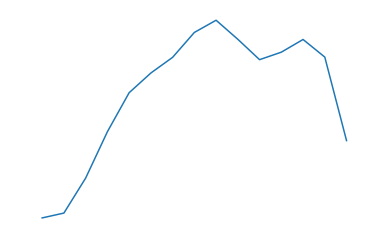

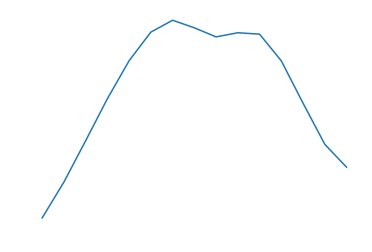

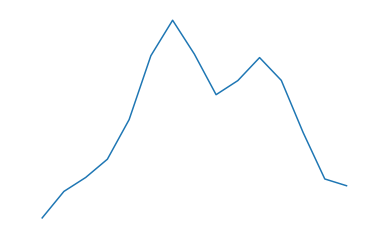

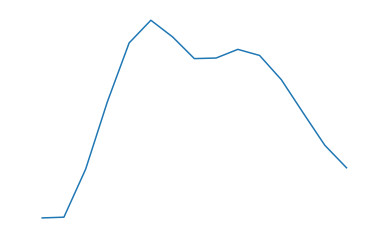

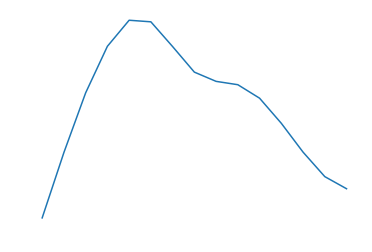

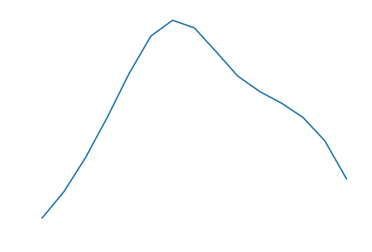

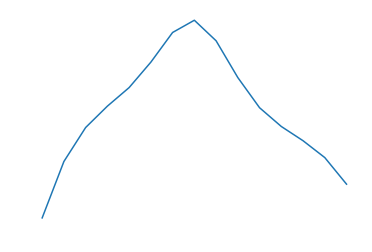

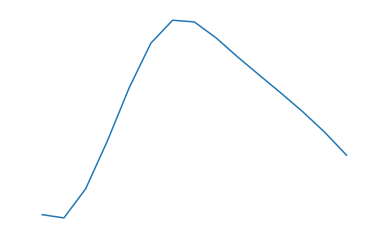

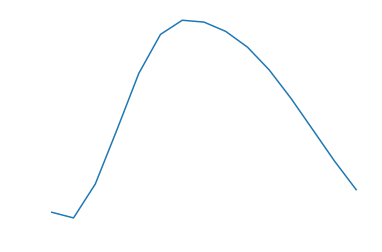

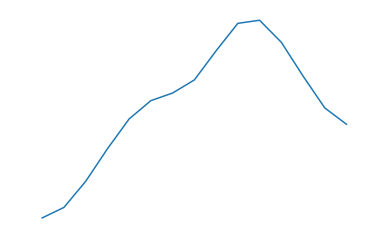

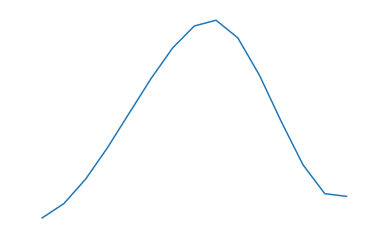

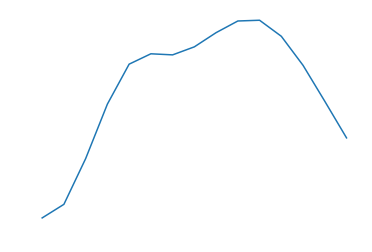

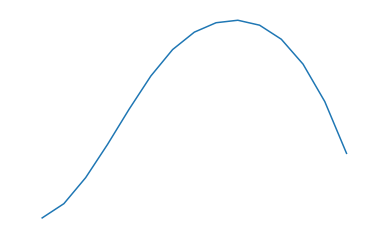

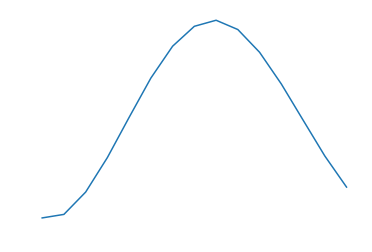

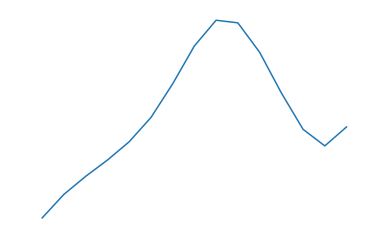

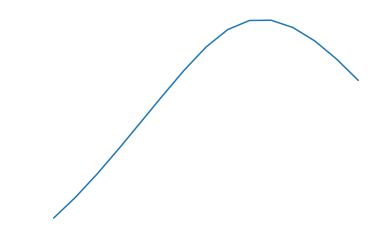

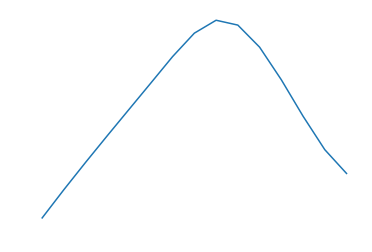

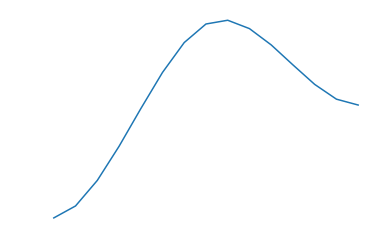

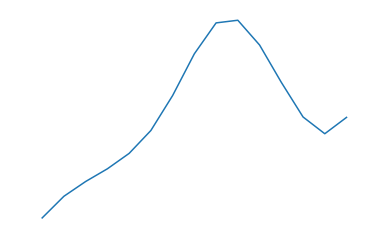

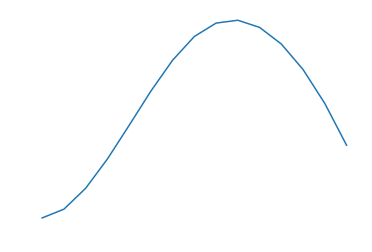

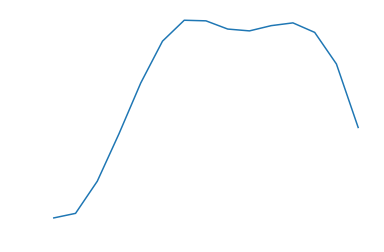

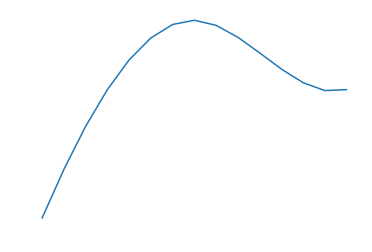

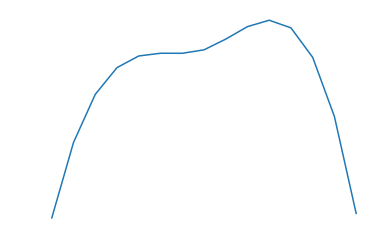

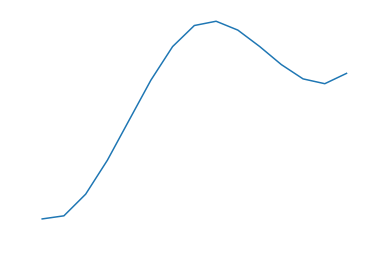

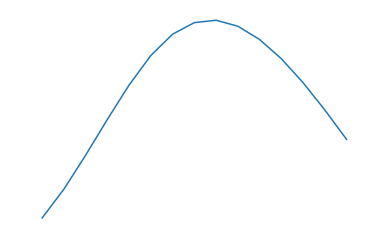

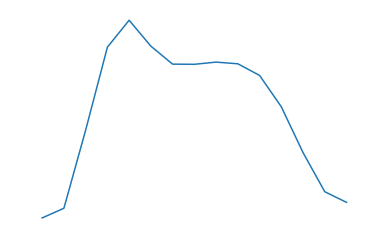

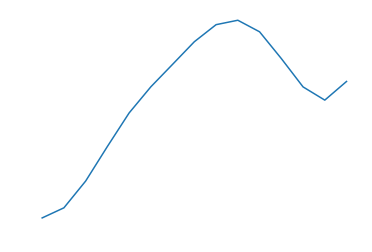

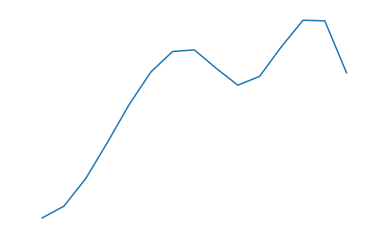

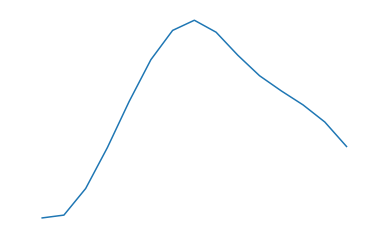

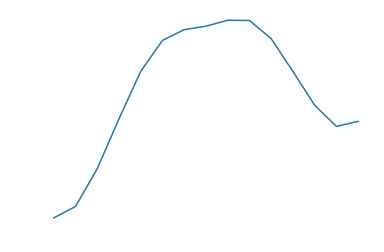

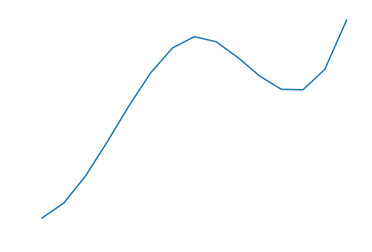

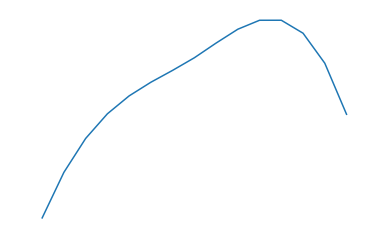

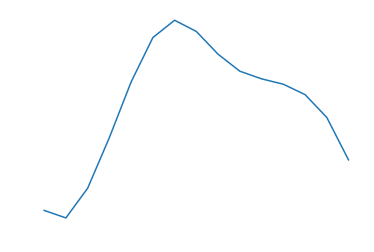

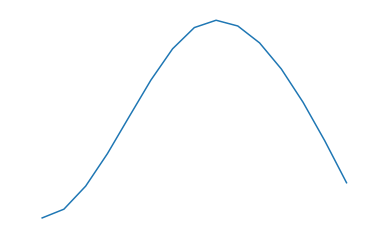

In [66]:
res = []

for b in breadths:
    data = d1[b[0]:b[2]]
    if(len(data) >= 5):
        y = data
        x = np.arange(len(data))
        new_length = 15
        new_x = np.linspace(x.min(), x.max(), new_length)
        new_y = scipy.interpolate.interp1d(x, y, kind='cubic')(new_x)
        res.append(new_y)
        #plt.plot(new_y)
        #plt.show()

for i,d in enumerate(res):
    
    plt.plot(d)
    fname = str(fnamesAerobika) + '/'  + str(i) + '_img.jpg' 
    plt.axis('off')
    plt.savefig(fname)
    plt.show()

array([60, 33, 23,  5, 33, 46, 40, 10, 92, 26, 16, 39,  0, 60, 80, 14, 29,
       65, 45, 64])